In [ ]:
#선형회귀


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [ ]:
# 단순선형회귀 모델 만들기

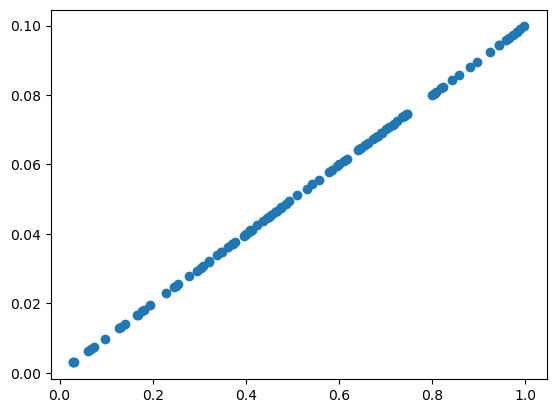

In [2]:
X = np.random.rand(100)
y = 0.2 *X* 0.5
plt.scatter(X,y)

In [6]:
def plt_prediction(pred, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.scatter(X, pred, color='orange', label='Prediction')
    plt.legend()
    plt.show()

In [38]:
# 경사하강법  y=wX+b , w결정
W=np.random.uniform(-1,1)

b=np.random.uniform(-1,1)
learning_rate = 0.5 #임의값




Epoch 0, W: 0.1530, Error: 0.6619


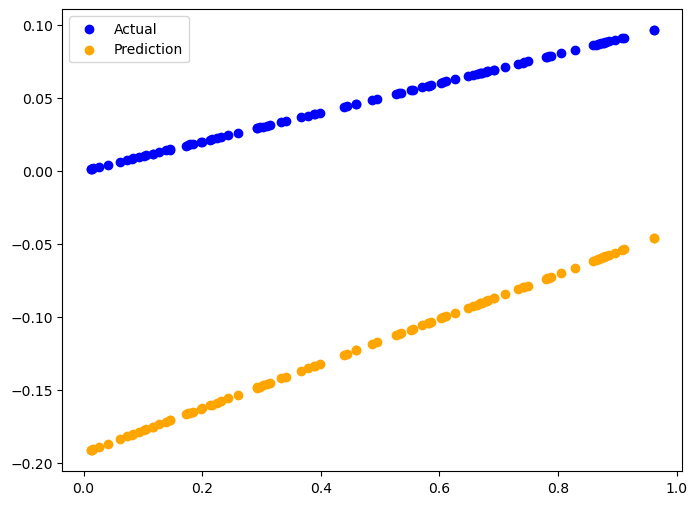

Epoch 10, W: 0.1606, Error: 0.0165


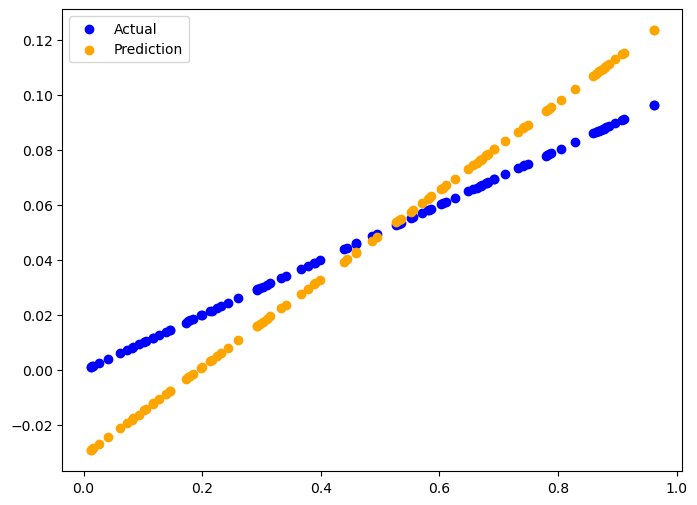

Epoch 20, W: 0.1304, Error: 0.0083


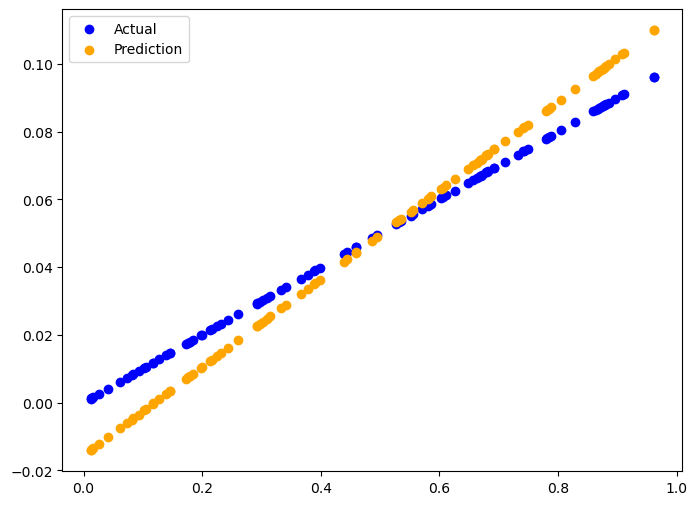

Epoch 30, W: 0.1153, Error: 0.0042


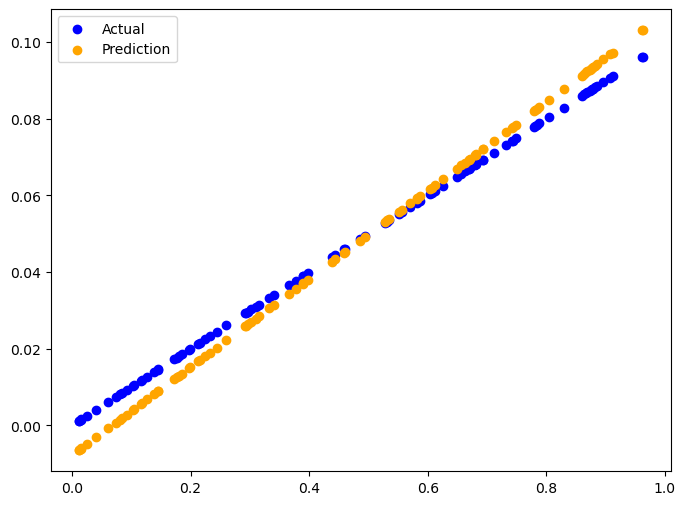

Epoch 40, W: 0.1077, Error: 0.0021


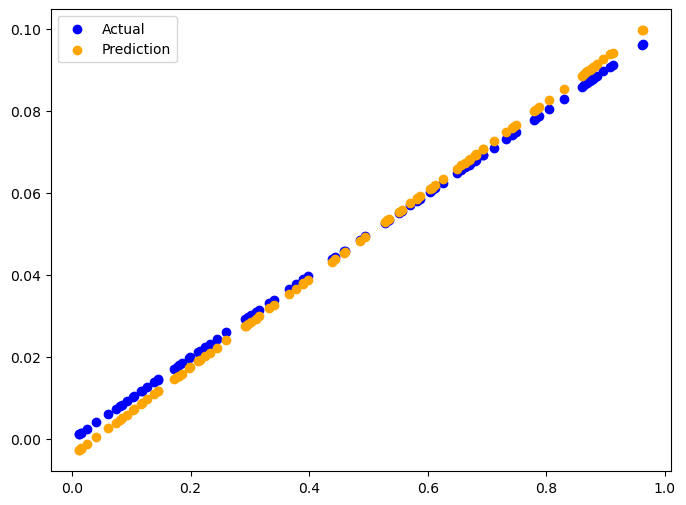

Epoch 50, W: 0.1039, Error: 0.0011


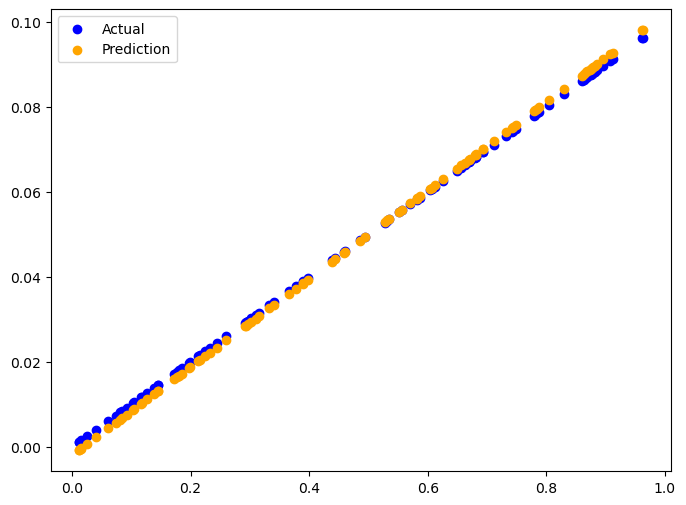

In [39]:
for epoch in range(100): # 반복 early_Stopping 줄수도 있다.
    y_pred= W *X +b
    error = np.abs(y_pred-y).mean()
    if error < 0.001: # 최상의 함수를 찾음
        break
    W_descent = learning_rate = ((y_pred-y)*X).mean()
    b_descent = learning_rate = ((y_pred-y).mean())
    W = W - W_descent
    b = b - b_descent
    if epoch%10== 0 :
        print(f'Epoch {epoch}, W: {W:.4f}, Error: {error:.4f}')
        y_pred = W*X+b
        plt_prediction(y_pred, y)
                
    
    

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [175]:
bostonDF = pd.read_csv('./data/boston.csv')
bostonDF.columns

X = bostonDF.drop('target', axis =1).values
y = bostonDF['target'].values
bostonDF.shape



(506, 14)

In [11]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]], shape=(506, 13))

In [13]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]


array([23.15424087, 19.65590246, 36.42005168])

In [15]:
# 평가
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mse, rmse


(np.float64(17.296915907902065), np.float64(4.158956107955705))

In [16]:
# 결정계수 (상관관계 )
r2_score(y_test, y_pred)





np.float64(0.7572263323138934)

In [731]:
#회귀식
#w1, w0            y = w0+x1+X2 + w2*X2 + ... + w13 * X13 
lr.intercept_, lr.coef_
np.round(lr.intercept_,1),np.round(lr.coef_,1)

(np.float64(41.0),
 array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
         -0. ,  -0.9,   0. ,  -0.6]))

In [732]:
pd.Series(data = np.round(lr.coef_,1), index = bostonDF.drop('target', axis=1).columns.sort_values(ascending=False))

ZN         -0.1
TAX         0.1
RM          0.0
RAD         3.0
PTRATIO   -19.8
NOX         3.4
LSTAT       0.0
INDUS      -1.7
DIS         0.4
CRIM       -0.0
CHAS       -0.9
B           0.0
AGE        -0.6
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [18]:
#MSE, RMSE, Rquare
RMSE=np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(5.828658946215813),
 array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405]))

In [19]:
#R2
r2_scores= cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)
#오차가 커지고(4.15>5.82),  결정계수도 작아진 결과


(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 np.float64(0.3532759243958839))

In [21]:
r2_score(y_test, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [152, 354]

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', (LinearRegression()))
])

model_poly.fit(X_train, y_train)
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [738]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=156)
model_poly = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('linear', LinearRegression())]
)
model_poly.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [739]:
pred_poly = model_poly.predict(X_test)
mean_squared_error(y_test, pred_poly)

np.float64(15.555752307472005)

In [740]:
r2_score(y_test, pred_poly)

np.float64(0.7816647163338353)

In [157]:
results = []

for degree in range(1,5):
  model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())]
  )
  model_poly.fit(X_train, y_train)
  pred_poly = model_poly.predict(X_test)
  mse = mean_squared_error(y_test, pred_poly)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, pred_poly)
  
  results.append({ 'degree':degree,
                  'MSE':mse,
                  'RMSE':rmse,
                  'R2': r2})

pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,3.471904e+07,5892.286219,0.731405
1,2,2.174132e+07,4662.759080,0.831804
2,3,2.276061e+07,4770.807903,0.823918
3,4,2.992883e+07,5470.724746,0.768463


# 보험분석

In [200]:
#predf = pd.read_csv('./data1/premium.csv')
# LinearRegressor & randomForestRrgressor
df = pd.read_csv('./data1/premium.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [306]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [ ]:

# 앞에서 설정한 데이터 전처리 함수 호출

In [268]:
#df.drop(columns=['region'], inplace=True)
df.shape
#df.drop(columns=['smoker'], inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [307]:

X = df.drop('charges', axis =1).values
y = df['charges'].values

In [308]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

#df.drop(columns=['smoker'], inplace=True)
#df.drop(columns=['sex'], inplace=True)
#df['bmi'].fillna(0)
#df.head(40)

In [190]:
#from sklearn.preprocessing import LabelEncoder
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=156)
#X_train.shape, y_train.shape
#le = LabelEncoder()
#y_train= le.fit_transform(y_train)  # Series → 1D array
#y_test = le.transform(y_test)

In [271]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]
#X_train = X_train.astype(float)

array([4132.90695994, 4382.85322667, 8623.55427217])

In [272]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[:3]

array([4132.90695994, 4382.85322667, 8623.55427217])

In [273]:
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mse, rmse


(np.float64(32275618.067438565), np.float64(5681.163443119602))

In [274]:
# 결정계수 (상관관계 )
r2_score(y_test, y_pred)

np.float64(0.7777125924508648)

In [275]:
#회귀식
#w1, w0            y = w0+x1+X2 + w2*X2 + ... + w13 * X13 
lr.intercept_, lr.coef_
np.round(lr.intercept_,1),np.round(lr.coef_,1)

(np.float64(-10199.3),
 array([ 2.60200e+02,  1.93000e+01,  2.84200e+02,  4.64700e+02,
         2.40213e+04, -4.82900e+02]))

In [276]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

X_train dtype: float64
y_train dtype: float64


In [277]:
#회귀식
#w1, w0            y = w0+x1+X2 + w2*X2 + ... + w13 * X13 
lr.intercept_, lr.coef_
np.round(lr.intercept_,1),np.round(lr.coef_,1)

(np.float64(-10199.3),
 array([ 2.60200e+02,  1.93000e+01,  2.84200e+02,  4.64700e+02,
         2.40213e+04, -4.82900e+02]))

In [278]:

from sklearn.model_selection import cross_val_score
neg_mse_scores= cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
neg_mse_scores

array([-37353966.14780101, -38018280.71475136, -32981193.39000173,
       -39560881.14778336, -37174240.90789752])

In [279]:
RMSE=np.sqrt(neg_mse_scores*-1)
np.mean(RMSE), RMSE

(np.float64(6081.484710559383),
 array([6111.78911186, 6165.89658645, 5742.92550796, 6289.74412419,
        6097.06822234]))

In [280]:
#R2
r2_scores= cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)

(array([0.75962321, 0.70729102, 0.77528105, 0.73350581, 0.7552539 ]),
 np.float64(0.7461909971637163))

In [319]:
#랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)


In [320]:
rf_clf = RandomForestClassifier(random_state=10, max_depth=3)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred[:3]

array([10601,  1242,  1880])

In [321]:
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mse, rmse

(np.float64(262993128.67591783), np.float64(16217.062886845997))

In [322]:
#r2_score(y_test, y_pred)
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=5)
r2_scores, np.mean(r2_scores)

(array([0.75962326, 0.70729125, 0.77527878, 0.73350409, 0.7552552 ]),
 np.float64(0.7461905158535348))

#  다항회귀 모델
# y = w0+w1X1+w2X2 + w3X1^2 + w4X1^3

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [316]:
results = []
best_r2=-np.inf
best_model = None
best_pred = None

for degree in range(1,5):
  model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear', LinearRegression())]
  )
  model_poly.fit(X_train, y_train)
  pred_poly = model_poly.predict(X_test)
  mse = mean_squared_error(y_test, pred_poly)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, pred_poly)
  
  results.append({ 'degree':degree,
                  'MSE':mse,
                  'RMSE':rmse,
                  'R2': r2})
  if r2> best_r2:
    best_r2 = r2
    best_model = model_poly
    best_pred = pred_poly
    
pd.DataFrame(results)

,degree,MSE,RMSE,R2
0,1,3.471904e+07,5892.286219,0.731405
1,2,2.174132e+07,4662.759080,0.831804
2,3,2.276061e+07,4770.807903,0.823918
3,4,2.992883e+07,5470.724746,0.768463


In [317]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [318]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [291]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

mse = mean_squared_error(y_test, pred_ridge)
r2  = r2_score(y_test, pred_ridge)
mse, r2

(np.float64(34752916.781278014), np.float64(0.7311430086866182))

In [292]:
from sklearn.linear_model import RidgeCV, LassoCV
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)


In [323]:
from sklearn.linear_model import Lasso
# 4. 라쏘 회귀

lasso = Lasso(alpha=0.1)  # alpha 값 작으면 규제 약해짐
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

print("\n[라쏘 회귀]")
print("MSE:", mean_squared_error(y_test, pred_lasso))
print("R2:", r2_score(y_test, pred_lasso))


[라쏘 회귀]
MSE: 34718958.15480812
R2: 0.7314054927829194


In [294]:
ridge_cv.fit(X_train, y_train)
ridge_preds = ridge_cv.predict(X_test)

In [295]:
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
print(f'ridge cv mse: {ridge_mse:4f}, r2 : {ridge_r2:4f}')

ridge cv mse: 34752916.781278, r2 : 0.731143


In [296]:
ridge_cv.alpha_

np.float64(1.0)

In [297]:
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_preds = lasso_cv.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

In [298]:
print(f"[개선 Lasso] 최적 alpha: {lasso_cv.alpha_}")
print(f"MSE: {lasso_mse:.3f}, R2: {lasso_r2:.3f}")

[개선 Lasso] 최적 alpha: 100.0
MSE: 34771340.208, R2: 0.731


In [299]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [300]:
enet_pred = enet.predict(X_test)
print("\n[엘라스틱넷 회귀]")
print("MSE:", mean_squared_error(y_test, enet_pred))
print("R2:", r2_score(y_test, enet_pred))


[엘라스틱넷 회귀]
MSE: 39905776.36954846
R2: 0.6912792374157983


In [301]:
results = pd.DataFrame({
  '모델' : ['다항회귀', '릿지회귀', '라쏘회귀', '엘라스틱넷회귀'],
  'MSE': [ mean_squared_error(y_test, pred_poly),
          mean_squared_error(y_test, pred_ridge),
          mean_squared_error(y_test, pred_lasso),
          mean_squared_error(y_test, enet_pred),
        ],
  'R2': [r2_score(y_test, best_pred),
          r2_score(y_test, pred_ridge),
          r2_score(y_test, pred_lasso),
          r2_score(y_test, enet_pred),
  ]
})
results

,모델,MSE,R2
0,다항회귀,2.992843e+07,0.831803
1,릿지회귀,3.475292e+07,0.731143
2,라쏘회귀,3.471897e+07,0.731406
3,엘라스틱넷회귀,3.990578e+07,0.691279


In [302]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)
model_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', (LinearRegression()))
])

model_poly.fit(X_train, y_train)


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])